<a href="https://colab.research.google.com/github/ertgrulyksk/FBprophet/blob/main/FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
!pip install fbprophet

In [3]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [4]:
baraj = pd.read_csv('baraj.csv')

In [5]:
baraj.head(3)

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [6]:
baraj.columns=["tarih","oran","miktar"]

In [7]:
baraj.head(3)

,tarih,oran,miktar
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [8]:
baraj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tarih   5941 non-null   object 
 1   oran    5941 non-null   float64
 2   miktar  5941 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.4+ KB


In [9]:
baraj['tarih']=pd.to_datetime(baraj['tarih'])

In [10]:
baraj.head(3)

,tarih,oran,miktar
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [11]:
baraj=baraj[['tarih','oran']]
baraj.head(3)

,tarih,oran
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47


In [12]:
baraj.columns=['ds','y']

In [13]:
model = Prophet()
model.fit(baraj)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = model.make_future_dataframe(periods=600)

In [15]:
tahmin = model.predict(future)

In [16]:
tahmin.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,64.943950,48.222353,65.793370,64.943950,64.943950,-8.046361,-8.046361,-8.046361,0.007435,0.007435,0.007435,-8.053796,-8.053796,-8.053796,0.0,0.0,0.0,56.897588
1,2005-01-02,64.982177,49.384411,66.149212,64.982177,64.982177,-7.659335,-7.659335,-7.659335,0.008994,0.008994,0.008994,-7.668330,-7.668330,-7.668330,0.0,0.0,0.0,57.322842
2,2005-01-03,65.020405,49.205002,66.087146,65.020405,65.020405,-7.275663,-7.275663,-7.275663,0.000251,0.000251,0.000251,-7.275914,-7.275914,-7.275914,0.0,0.0,0.0,57.744742


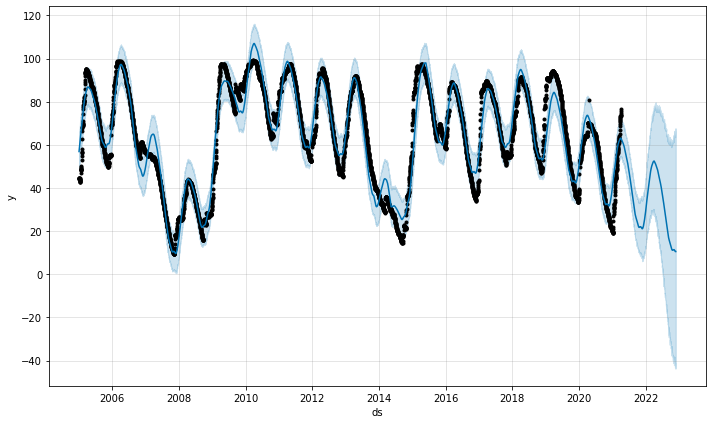

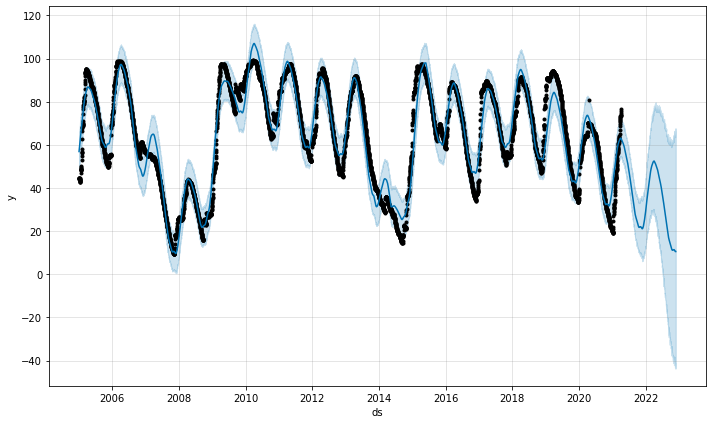

In [17]:
model.plot(tahmin)

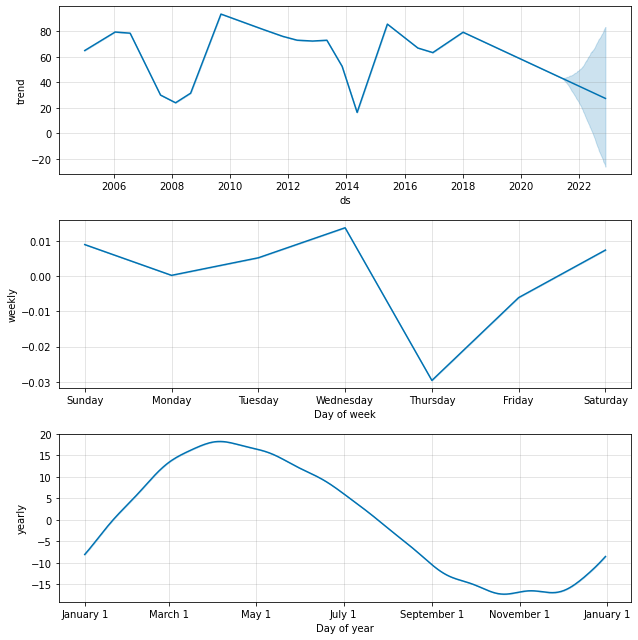

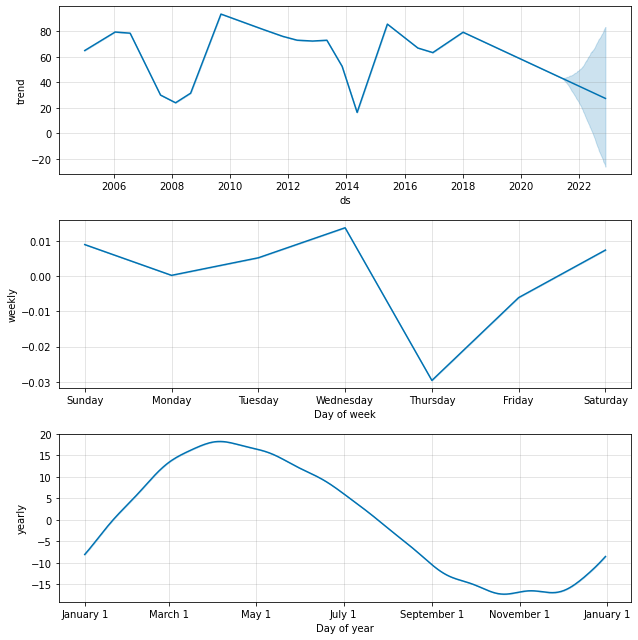

In [18]:
model.plot_components(tahmin)

In [19]:
coffee = pd.read_csv('coffee.csv')

In [20]:
coffee.head(3)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.0,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.5,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.0,115.00,118.60,6165,USD


In [21]:
coffee = coffee[['Date','Close']]

In [22]:
coffee.head(3)

,Date,Close
0,2000-01-03,116.50
1,2000-01-04,116.25
2,2000-01-05,118.60


In [23]:
coffee.columns = ['ds', 'y']

In [24]:
model = Prophet()
model.fit(coffee)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = model.make_future_dataframe(periods=1085)

In [26]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [27]:
import yfinance as yf
import matplotlib.pyplot as plt

In [28]:
google = yf.download("GOOG","2005-01-01", "2022-10-01")

[*********************100%***********************]  1 of 1 completed


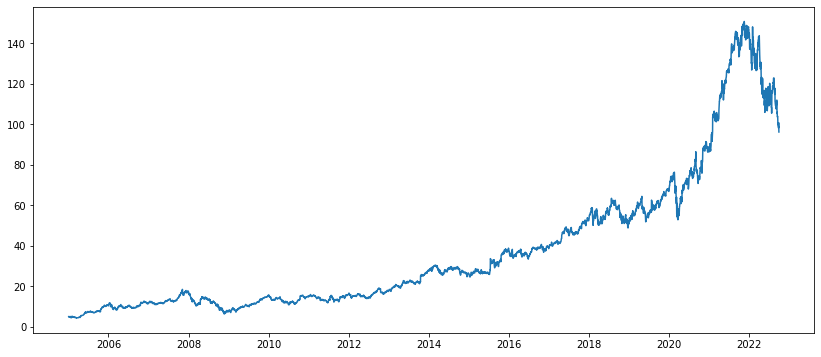

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(google.index, google['Close'])
plt.show()

In [30]:
google.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912


In [31]:
google = google.reset_index()

In [32]:
google.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
1,2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2,2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912


In [33]:
google = google[['Date', 'Close']]
google.columns = ['ds', 'y']
google.head(3)

,ds,y
0,2005-01-03,5.048826
1,2005-01-04,4.844342
2,2005-01-05,4.819685


In [34]:
model = Prophet()
model.fit(google)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = model.make_future_dataframe(periods=600)
tahmin = model.predict(future)

In [36]:
plot_plotly(model, tahmin)

In [37]:
### Apple Tesla Microsoftun son5 5 yıllık grafiklerini bir çizgi grafiğinde gösterin

In [38]:
# AAPL TSLA MSFT

In [39]:
apple = yf.download("AAPL", "2005-10-01", "2022-10-01")
microsoft = yf.download("MSFT", "2005-10-01", "2022-10-01")
google = yf.download("GOOG", "2005-10-01", "2022-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


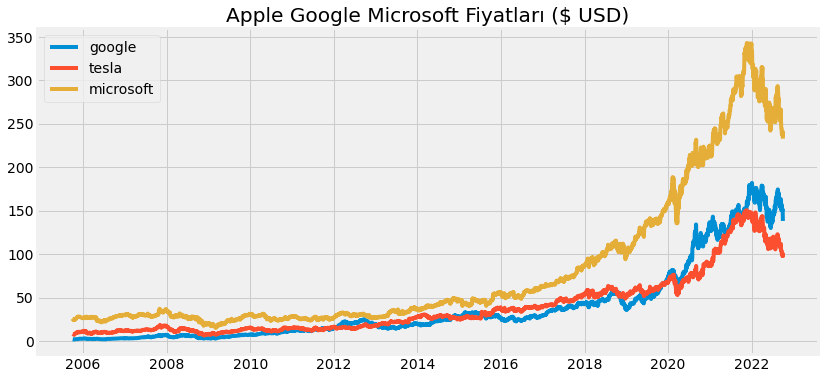

In [40]:
plt.figure(figsize=(14, 6))
plt.style.use("fivethirtyeight")
plt.plot(apple.index, apple['Close'])
plt.plot(google.index, google['Close'])
plt.plot(microsoft.index, microsoft['Close'])
plt.legend(["google", "tesla", "microsoft"])
plt.title("Apple Google Microsoft Fiyatları ($ USD)")
plt.show()